In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras import layers
import keras


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  # ✅ Works in TensorFlow 2.x
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [28]:
#!pip install tensorflow==2.7.0
#!pip install pydot

In [29]:
#Loading digit mnist dataset
(X_train_digit, Y_train_digit), (X_test_digit, Y_test_digit) = mnist.load_data()

In [30]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [31]:
Y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']


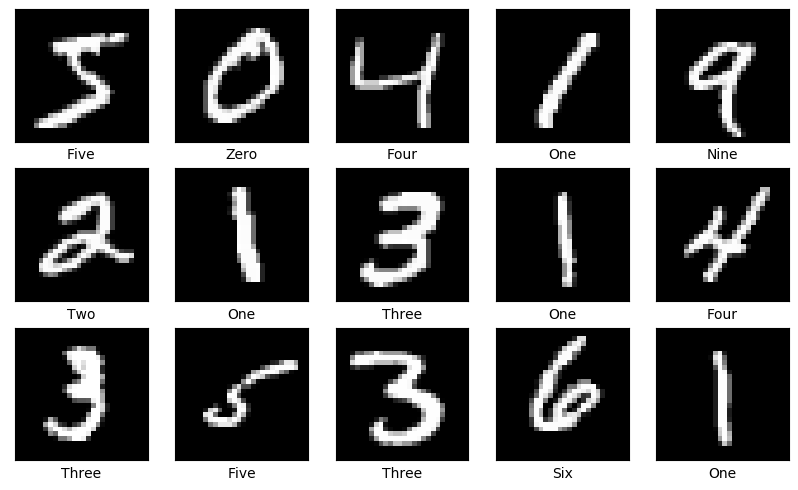

In [33]:
#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[Y_train_digit[i]])
plt.show()

In [34]:
X_train_digit.shape

(60000, 28, 28)

In [35]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [36]:
X_train_digit.shape

(60000, 784)

In [37]:
Y_test_digit.shape

(10000,)

In [38]:
Y_train_digit = to_categorical(Y_train_digit, num_classes=10)

Y_test_digit = to_categorical(Y_test_digit, num_classes=10)

In [39]:
Y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
#Creating base neural network

model=keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [41]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                      

In [42]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [44]:
history=model.fit(X_train_digit,Y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,Y_test_digit))

Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 0.5770 - accuracy: 0.8273 - val_loss: 0.1417 - val_accuracy: 0.9593
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2488 - accuracy: 0.9307 - val_loss: 0.1240 - val_accuracy: 0.9620
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1946 - accuracy: 0.9449 - val_loss: 0.1063 - val_accuracy: 0.9683
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1695 - accuracy: 0.9523 - val_loss: 0.0911 - val_accuracy: 0.9738
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1509 - accuracy: 0.9574 - val_loss: 0.0901 - val_accuracy: 0.9723
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1383 - accuracy: 0.9605 - val_loss: 0.0905 - val_accuracy: 0.9730
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1296 - accuracy: 0.9623 - val_loss: 0.0830 - val_accuracy: 0.9744
Epoch

In [45]:
Y_predict=model.predict(X_test_digit)

In [47]:
Y_predicts=np.argmax(Y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [48]:
Y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
Y_test_digit_eval=np.argmax(Y_test_digit, axis=1)

In [51]:
Y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

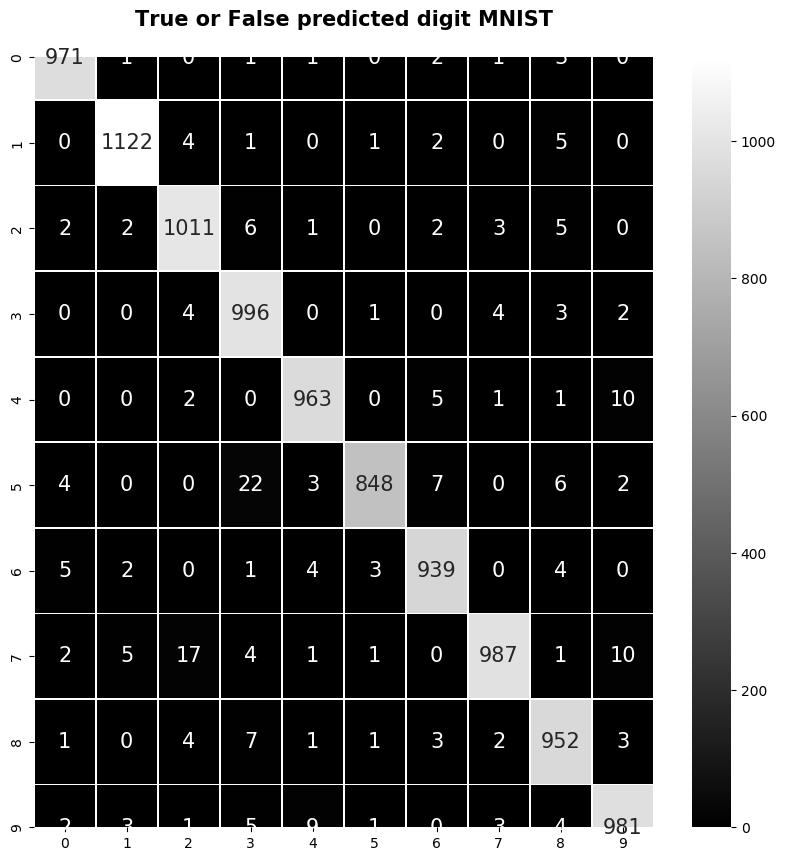

In [53]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(Y_test_digit_eval,Y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [54]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_digit_eval,Y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



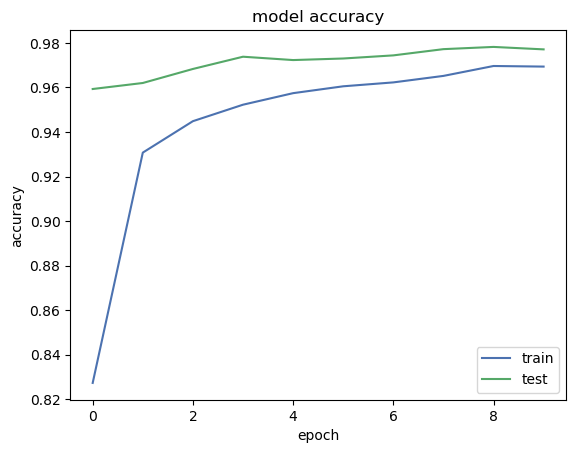

In [55]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

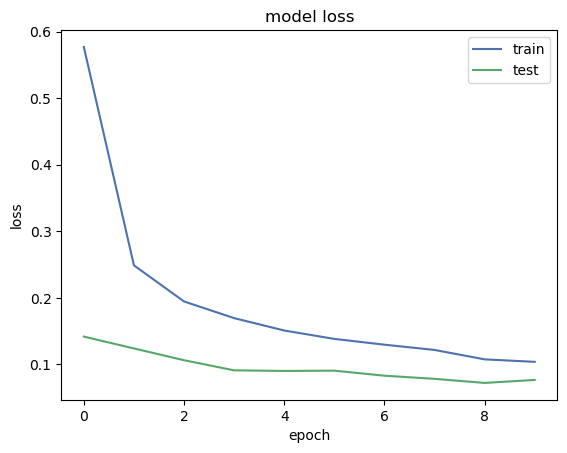

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### Prediction for a single digit. lets take digit in position 2 in X_test

In [75]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [80]:
y_predicts_single

array([1], dtype=int64)

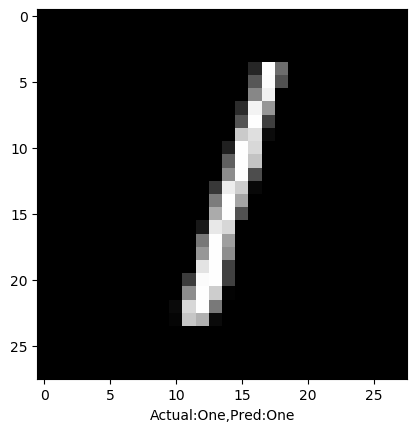

In [76]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()